# BL40A2030 Wireless Communication Networks

## Week 1 - Assignment

### Author: Alexander Beattie

### Part I: Theory (40%)

**1. Explain with your own words (1 or 2 paragraphs) the three-layer model presented in the lecture and in [[2]](https://www.ece.rutgers.edu/~marsic/books/CN/book-CN_marsic.pdf).**

The three layer model is a reference architecture for computer networking protocols that comprises the link, network, and end-to-end layers.
The first layer, the link layer, is at the bottom of the stack and is involved in transporting packets between physically connected nodes.
Additionally there is a physical layer but this is bundled with the link layer in this model since the two are so tightly coupled.
The next layer, the network layer, is responsible for connecting end hosts and links together. This layer is responsible for getting information from one node
to another across interconnected pathways but it is no concerned with the applications that will consume the data on the end node.
The final layer, the end-to-end layer, is responsible for bringing all communication specific features of an application together.
This follows the end-to-end principal where communications protocol operations occur ath the end-points of a communication system.
This ensures that lower layers on the protocol stack do not need information about how an application will use or consume the provided data.

**2. Retransmissions via ARQ are important to the system reliability (lower packet error probability) but it has some drawbacks. However, it has some effects in the delay and traffic congestion. Describe with your own words one of the existing trade-offs.** (Hint: If restransmissions are allowed, the packet will stay in *walking* in the network more time).
ARQ improves the reliability of transmitted packets but has some drawbacks.
For example, using an ARQ system will require double the amount of traffic in the link per packet because each transmitted packet will have to have an ACK message to accompany it sent from the receiver.
Additionally, ARQ can introduce delays in transmission depending on how it is implemented. If using stop and wait ARQ the next packet cannot be transmitted until the current one is acknowledged which incurs significant delays.
There is a further delay if the packet is not acknowledged and needs to be retransmitted which requires the packet to be in transit twice as long. If using a method like go-back-n or selective repeat
the delay is reduced since you do not need to wait for the previous packets acknowledgement before sending the next one. ARQ also adds additional complexity to processing received packets which can add
processing delay time.


### Part II: Jupyter NB experiments (60%)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**3. Analyze a queue system similar to the tutorial considering $\lambda = 3$ and $\mu = 4$ for 2000 time periods.** 
- Plot a histogram of the queue sizes.
- Compute the ratio of idle periods (0 elements in the queue) in relation to all time periods.

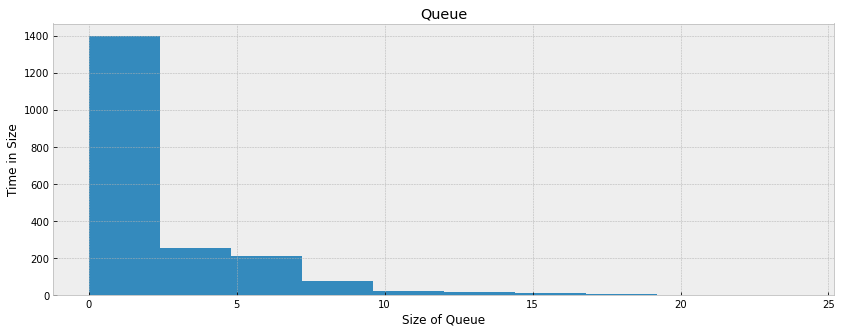

Ratio of idle periods compared to all time periods: 984 / 2000 = 0.492


In [32]:
#time periods

size=2000
#Arrival
mean=3
arrival = np.random.poisson(mean, size)
#Service
mean=4
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])

plt.figure(figsize=(14,5))
plt.hist( queue)
plt.xlabel('Size of Queue')
plt.ylabel('Time in Size')
plt.title('Queue')
plt.grid(True) #grid
plt.show()

num_zeros =  (queue == 0).sum()
ratio = num_zeros / size
print('Ratio of idle periods compared to all time periods:', num_zeros, '/', size ,'=', ratio)



In this queue there is a fairly high ratio of idle periods which is to be expected if the rate of arrivals is lower than the service interval.
The histogram shows this because there is a large period where there are 0 elements in the queue.

**4. Analyze a queue system similar to the tutorial considering $\lambda = 4$ and $\mu = 3$ for 2000 time periods.** 
- Plot a histogram of the queue sizes.
- Compute the ratio of idle periods (0 elements in the queue) in relation to all time periods.

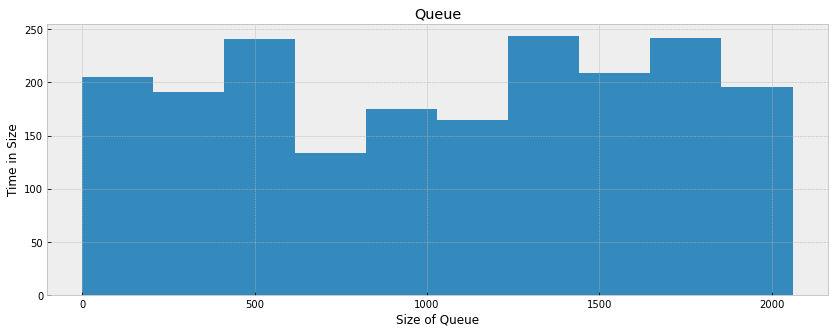

Ratio of idle periods compared to all time periods: 1 / 2000 = 0.0005


In [35]:
#time periods

size=2000
#Arrival
mean=4
arrival = np.random.poisson(mean, size)
#Service
mean=3
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])

plt.figure(figsize=(14,5))
plt.hist( queue)
plt.xlabel('Size of Queue')
plt.ylabel('Time in Size')
plt.title('Queue')
plt.grid(True) #grid
plt.show()

num_zeros =  (queue == 0).sum()
ratio = num_zeros / size
print('Ratio of idle periods compared to all time periods:', num_zeros, '/', size ,'=', ratio)


This histogram shows what happens when the rate of arrivals is greater then the rate of service. This means that the service cannot keep up so the
queue cannot be fully processed for a majority of the process. There are periods where the size of the queue decreases but overall
the requests cannot be processed fast enough which shows the importance of having a rate of service greater than the rate of arrivals.
There is an almost 0 ratio of idle periods compared to entire time period since requests are arriving to quickly.


**5. Analyze a queue system similar to the tutorial considering $\lambda = 3$ and $\mu = 3$ for 2000 time periods.** 
- Plot a histogram of the queue sizes.
- Compute the ratio of idle periods (0 elements in the queue) in relation to all time periods.

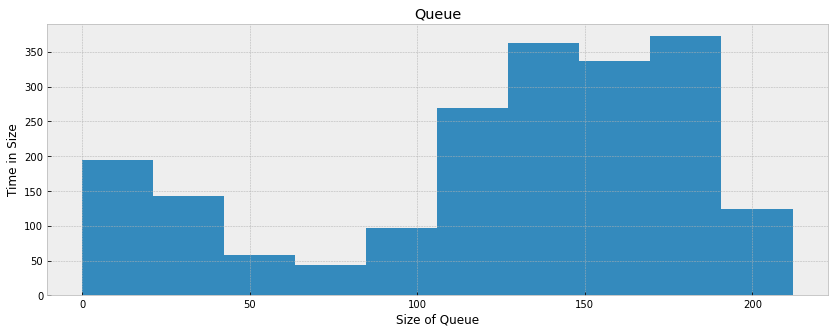

Ratio of idle periods compared to all time periods: 5 / 2000 = 0.0025


In [34]:
#time periods

size=2000
#Arrival
mean=3
arrival = np.random.poisson(mean, size)
#Service
mean=3
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])

plt.figure(figsize=(14,5))
plt.hist( queue)
plt.xlabel('Size of Queue')
plt.ylabel('Time in Size')
plt.title('Queue')
plt.grid(True) #grid
plt.show()

num_zeros =  (queue == 0).sum()
ratio = num_zeros / size
print('Ratio of idle periods compared to all time periods:', num_zeros, '/', size ,'=', ratio)


This histogram shows that when the rate of arrivals matches the rate of service there is less of a delay but performance is still impacted.
This illustrates that when designing a system you should always design it so that the estimated rate of service is greater than the rate of arrival.
The queue remains between 100 and 200 for a large portion of time which seems to be the arrival vs. service stagnation point for this model.